# Анализ поведения пользователей и результатов A/A/B-эксперимента в мобильном приложении по продаже продуктов питания

<div class="alert alert-success">
  <b> ✔️Комментарий ревьюера ✔️</b>

Привет, Артемий! Меня зовут Михаил, я буду проверять твой проект. Предлагаю общаться на 'ты' :)
Однако, если это неудобно - сообщи, и мы перейдем на 'Вы'. Моя главная цель —  поделиться с тобой своим опытом и помочь тебе стать крутым специалистом, а не только указать на совершенные тобой ошибки.

Видно, что к проекту приложен большой труд. Все ключевые этапы в работе выполнены, статистическое исследование проведено качественно. Так что в целом справиться с задачей тебе удалось.

Есть несколько аспектов, которые **требуют** твоего **внимания**. Комментарии по ним помечены красным цветом и символами ❌. После их доработки проект будет принят, осталось совсем немного :) 
    

Давай работать над проектом в диалоге: если **ты что-то меняешь** в проекте по моим рекомендациям — **пиши об этом**. Мне будет легче отследить изменения, если ты будешь использовать синюю форму, которую я прикреплю ниже. Пожалуйста, **не перемещай, не изменяй и не удаляй мои комментарии**. Всё это поможет выполнить повторную проверку твоего проекта оперативнее. 



Жду проект на повторное ревью. Успехов в изучении!



</div>
<div class="alert alert-block alert-danger"> <b>❌ Комментарий ревьюера ❌</b> 
    Так я выделяю моменты, которые требуют особого внимания. Нужно будет учесть их и внести корректировки в свою работу. </div>
<div class="alert alert-block alert-warning"> <b>⚠️ Комментарий ревьюера ⚠️</b> 
    Желтым я отмечу рекомендации, которые, могут быть полезными при твоей работе. Они носят рекомендационный характер, но будет классно, если ты будешь учитывать их при работе.</div>
<div class="alert alert-block alert-success"> <b>✔️ Комментарий ревьюера ✔️</b>
    Так я выделяю удачные и элегантные решения, на которые можно опираться в будущих проектах.</div>
<div class="alert alert-block alert-info">
    
А в таком блоке ты можешь оставить комментарии для меня 
    
</div>

Цель данного исследования — изучить поведение пользователей мобильного приложения, специализирующегося на продаже продуктов питания, с акцентом на анализ воронки продаж и результатов A/A/B-эксперимента. Понимание того, как пользователи взаимодействуют с приложением и доходят до покупки, критически важно для оптимизации конверсии и повышения общей эффективности бизнес-процессов.

В первой части исследования мы познакомимся с предложенными данными, в которых каждая запись в логе — это действие пользователя или событие. Данные из датасета logs_exp.csv имеют следующую структуру:

- EventName — название события;
- DeviceIDHash — уникальный идентификатор пользователя;
- EventTimestamp — время события;
- ExpId — номер эксперимента: 246 и 247 — контрольные группы, а 248 — экспериментальная.

Вторая часть посвящена предобработке данных и подготовке их к дальнейшему анализу.

В третьей части мы подробнее взглянем на события, записанные в логи, и опишем их количественные и качественные характеристики. Будет проведён исследовательский анализ данных.

В четвёртой части исследования перейдём непосредственно к рассмотрению воронки продаж, что позволит выявить, на каких этапах пользователи «застревают» и сколько из них успешно завершают покупку. Этот анализ поможет определить ключевые точки отказа и области для улучшения пользовательского опыта.

Пятая часть исследования посвящена оценке результатов A/A/B-эксперимента, проведённого для анализа влияния изменений в интерфейсе приложения на поведение пользователей. В частности, было протестировано изменение шрифтов, что вызвало опасения у менеджеров по поводу возможного негативного восприятия со стороны пользователей. В эксперименте участвовали три группы пользователей: две контрольные, использующие старые шрифты, и одна экспериментальная — с новыми шрифтами. Сравнение данных между этими группами позволяет оценить, как изменения интерфейса влияют на ключевые метрики, и выбрать наилучший вариант шрифта для улучшения пользовательского опыта.

Таким образом, данное исследование предоставляет всесторонний анализ поведения пользователей и оценку влияния дизайнерских изменений на их взаимодействие с приложением, что поможет принять обоснованные решения по дальнейшему развитию продукта.

<div class="alert alert-success">

**✔️ Комментарий ревьюера ✔️**
   
   Хорошее введение в проект - пригодится в будущем, когда соберешь большое портфолио и откроешь проект вновь👍

</div>


Перед началом исселовадния импортируем библиотеки и создадим функции, которые будем использовать в проекте

In [1]:
import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math as mth
import plotly.express as px

In [2]:
def primary_analysis(df):

    print("Информация о датафрейме:")
    print(df.info())
    
    print("\nПервые 5 строк датафрейма:")
    print(df.head())
    
    print("\nОписание численных столбцов:")
    print(df.describe())
    
    print("\nКоличество явных дубликатов в датасете:")
    print(df.duplicated().sum())
    
    print("\nЧастота распределений для категориальных столбцов:")
    for column in df.select_dtypes(include=['object', 'category']).columns:
        print(f"\nСтолбец '{column}':")
        print(df[column].value_counts())

In [3]:
def z_test_proportions(successes, trials, alpha=0.05):
    # Конверсии для каждой группы
    p1 = successes[0] / trials[0]
    p2 = successes[1] / trials[1]
    
    # Комбинированная конверсия
    p_combined = (successes[0] + successes[1]) / (trials[0] + trials[1])
    
    # Разница пропорций
    difference = p1 - p2
    
    # Стандартное отклонение для разницы долей
    z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/trials[0] + 1/trials[1]))
    
    # Стандартное нормальное распределение
    distr = stats.norm(0, 1)
    
    # Вычисление p-значения
    p_value = (1 - distr.cdf(abs(z_value))) * 2  # двустороннее p-value
    
    display('p-значение:', p_value)
    
    # Проверка гипотезы
    if p_value < alpha:
        display('Отвергаем нулевую гипотезу: между долями есть значимая разница')
    else:
        display('Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными')

## Знакомство с данными 

Загрузим датасет и изучим общую информацию

In [4]:
df = pd.read_csv('/datasets/logs_exp.csv', sep='\t')
primary_analysis(df)

Информация о датафрейме:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   EventName       244126 non-null  object
 1   DeviceIDHash    244126 non-null  int64 
 2   EventTimestamp  244126 non-null  int64 
 3   ExpId           244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB
None

Первые 5 строк датафрейма:
                 EventName         DeviceIDHash  EventTimestamp  ExpId
0         MainScreenAppear  4575588528974610257      1564029816    246
1         MainScreenAppear  7416695313311560658      1564053102    246
2  PaymentScreenSuccessful  3518123091307005509      1564054127    248
3         CartScreenAppear  3518123091307005509      1564054127    248
4  PaymentScreenSuccessful  6217807653094995999      1564055322    248

Описание численных столбцов:
       DeviceIDHash  EventTimestamp          ExpId
count

В предоставленном датафрейме содержится 244126 записей, каждая из которых представляет событие, зарегистрированное в мобильном приложении. Данные включают четыре столбца, формат названия которых мы немного подкорректируем в следующей главе: 

- EventName (тип данных: object): Название события, которое произошло в приложении. Например, события могут быть связаны с появлением главного экрана, экрана предложений, корзины или успешной оплатой. Наиболее частое событие — MainScreenAppear (появление главного экрана).

- DeviceIDHash (тип данных: int64): Уникальный идентификатор устройства пользователя. Он используется для отслеживания активности каждого пользователя.

- EventTimestamp (тип данных: int64): Временная метка события, представляющая время его регистрации. Указан направльный тип данных - исправим его на datetime64 в следующей главе.

- ExpId (тип данных: int64): Номер эксперимента, к которому относится событие. В данных есть три эксперимента: 246, 247 (контрольные группы) и 248 (экспериментальная группа).

Среди данных отсутствуют пропущенные значения, однако обнаружено 413 явных дубликатов, на которые мы взглянем позже. 

Наиболее частое событие — MainScreenAppear, которое встречается 119205 раз. Затем идет OffersScreenAppear с 46825 раз. После CartScreenAppear с 42731 раз и PaymentScreenSuccessful с 34313 раз. Менее частое событие - Tutorial, которое встречается  всего 1052 раза. 

Займемся преобработкой данных - обработаем дубликаты, изменим названия столбцов и тип данных, а также для более удобной работы добавим столбец только с датой.

<div class="alert alert-success">

**✔️ Комментарий ревьюера ✔️**
   
   Хорошо. Приступим к предобработке

</div>


## Предобработка данных

Начнем с названия столбцов и поменяем буквы с их названия с прописных на строчные:

In [5]:
df.columns = [x.lower() for x in df.columns]
display(df.columns)

Index(['eventname', 'deviceidhash', 'eventtimestamp', 'expid'], dtype='object')

Преобразуем тип данных eventtimestamp в более подходящий для него datetime64. 

In [6]:
df['eventtimestamp'] = pd.to_datetime(df['eventtimestamp'], unit='s')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   eventname       244126 non-null  object        
 1   deviceidhash    244126 non-null  int64         
 2   eventtimestamp  244126 non-null  datetime64[ns]
 3   expid           244126 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 7.5+ MB


Поработаем с дубликатами - попробуем взглянуть, что из себя представляют эти дубликаты.

In [7]:
all_duplicates = df[df.duplicated(keep=False)]
all_duplicates.head(50)

,eventname,deviceidhash,eventtimestamp,expid
452,MainScreenAppear,5613408041324010552,2019-07-30 08:19:44,248
453,MainScreenAppear,5613408041324010552,2019-07-30 08:19:44,248
2348,CartScreenAppear,1694940645335807244,2019-07-31 21:51:39,248
2350,CartScreenAppear,1694940645335807244,2019-07-31 21:51:39,248
3572,MainScreenAppear,434103746454591587,2019-08-01 02:59:37,248
3573,MainScreenAppear,434103746454591587,2019-08-01 02:59:37,248
4075,MainScreenAppear,3761373764179762633,2019-08-01 03:47:46,247
4076,MainScreenAppear,3761373764179762633,2019-08-01 03:47:46,247
4801,MainScreenAppear,2835328739789306622,2019-08-01 04:44:01,248
4803,MainScreenAppear,2835328739789306622,2019-08-01 04:44:01,248


Судя по анализу первых 50 строк, мы можем констатировать, что некоторые сессии содержат дубликаты. Это может сильно повлиять на анализ воронки и A/A/B-тестирование. Поэтому мы удалим дубликаты, оставив только последние вхождения повторяющихся строк, и дополнительно сбросим индексацию измененного датафрейма.

In [8]:
df = df.drop_duplicates(keep='last').reset_index()

In [9]:
df.duplicated().sum()

0

В рамках предобработки данных сделаем последнее действие - добавим отдельный столбец с датой.

In [10]:
df['eventdate'] = df['eventtimestamp'].dt.date
df.head()

,index,eventname,deviceidhash,eventtimestamp,expid,eventdate
0,0,MainScreenAppear,4575588528974610257,2019-07-25 04:43:36,246,2019-07-25
1,1,MainScreenAppear,7416695313311560658,2019-07-25 11:11:42,246,2019-07-25
2,2,PaymentScreenSuccessful,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25
3,3,CartScreenAppear,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25
4,4,PaymentScreenSuccessful,6217807653094995999,2019-07-25 11:48:42,248,2019-07-25


<div class="alert alert-success">

**✔️ Комментарий ревьюера ✔️**
   
   Очень хорошо, что не забываешь проверять данные на наличие пропусков и дубликатов.  Молодец, что приводишь даты к нужному формату - предобработка проведена отлично.

</div>

## Исследовательский анализ данных

В рамках исследовательского анализа данных отвестим на несколько вопросов:
- Сколько всего событий в логе? 
- Сколько всего пользователей в логе?
- Сколько в среднем событий приходится на пользователя?
- Данными за какой период мы располагаем? 

In [11]:
total_events = df.shape[0]
display(f'Общее количесвто событий в логе: {total_events}')
deviceidhash_count = df['deviceidhash'].nunique()
display(f'Общее количество пользователей в логе: {deviceidhash_count}')
average_events_per_user = total_events/deviceidhash_count
display(f'В среднем на пользователя приходится {average_events_per_user:.2f} события.')
min_date = df['eventdate'].min()
max_date = df['eventdate'].max()
display(f'Данные были собраны в период от {min_date} вплоть до {max_date}')

'Общее количесвто событий в логе: 243713'

'Общее количество пользователей в логе: 7551'

'В среднем на пользователя приходится 32.28 события.'

'Данные были собраны в период от 2019-07-25 вплоть до 2019-08-07'

Теперь изучим, как меняется количество данных: построим столбчатую диаграмму, которая отобразит количество событий в зависимости от времени в разрезе групп. Взглянем одинаково ли полные данные у нас за весь период исследованного времени. 

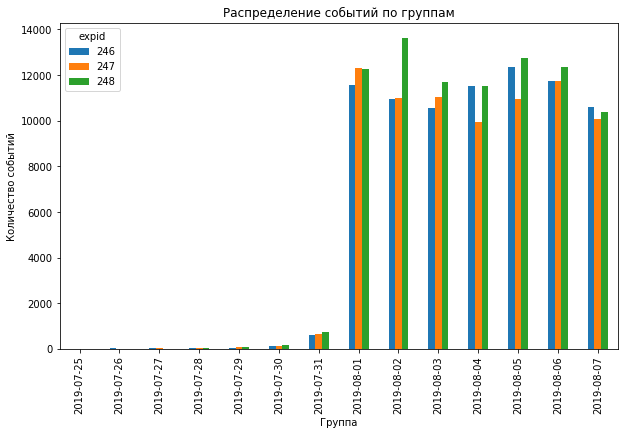

In [12]:
events_per_date = df.pivot_table(index='eventdate', columns='expid', values='index', aggfunc='count', fill_value=0)
events_per_date.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Группа')
plt.ylabel('Количество событий')
plt.title('Распределение событий по группам')
plt.show()

На основании анализа количества событий можно сделать вывод, что данные, которыми мы располагаем, охватывают период с 1 по 7 августа 2019 года включительно. Следовательно, необходимо удалить информацию за июль и оставить только данные за первую неделю августа для дальнейшего анализа в следующих главах исследования. После удаления данных следует провести проверку объема удаленной информации и убедиться в наличии пользователей во всех трех экспериментальных группах. В завершение рекомендуется построить столбчатую диаграмму для визуализации полученных данных.

In [13]:
df = df[(df['eventdate'] >= pd.Timestamp('2019-08-01')) & (df['eventdate'] <= pd.Timestamp('2019-08-07'))]
df.info

<bound method DataFrame.info of          index           eventname         deviceidhash      eventtimestamp  \
2826      2828            Tutorial  3737462046622621720 2019-08-01 00:07:28   
2827      2829    MainScreenAppear  3737462046622621720 2019-08-01 00:08:00   
2828      2830    MainScreenAppear  3737462046622621720 2019-08-01 00:08:55   
2829      2831  OffersScreenAppear  3737462046622621720 2019-08-01 00:08:58   
2830      2832    MainScreenAppear  1433840883824088890 2019-08-01 00:08:59   
...        ...                 ...                  ...                 ...   
243708  244121    MainScreenAppear  4599628364049201812 2019-08-07 21:12:25   
243709  244122    MainScreenAppear  5849806612437486590 2019-08-07 21:13:59   
243710  244123    MainScreenAppear  5746969938801999050 2019-08-07 21:14:43   
243711  244124    MainScreenAppear  5746969938801999050 2019-08-07 21:14:58   
243712  244125  OffersScreenAppear  5746969938801999050 2019-08-07 21:15:17   

        expid   eve

Посчитаем, сколько мы потеряли данныx после проведенных манипуляций

In [65]:
df_raw = pd.read_csv('/datasets/logs_exp.csv', sep='\t') # снова введем изначальный датасет

In [70]:
loss_deviceidhash_absolute = df_raw['DeviceIDHash'].nunique() - df['deviceidhash'].nunique()

# Вычисление относительного показателя
loss_deviceidhash_relative = 100 - (df['deviceidhash'].nunique() / df_raw['DeviceIDHash'].nunique() * 100)
loss_deviceidhash_relative = round(loss_deviceidhash_relative, 2)

# Преобразование в строку и добавление символа '%'
loss_deviceidhash_relative = str(loss_deviceidhash_relative) + '%'

display(f'Абсолютный показатель потери пользователей составляет: {loss_deviceidhash_absolute}')
display(f'Относительный показатель потери пользователей составляет: {loss_deviceidhash_relative}')

'Абсолютный показатель потери пользователей составляет: 17'

'Относительный показатель потери пользователей составляет: 0.23%'

In [72]:
loss_eventname_absolute = df_raw['EventName'].count() - df['eventname'].count()
loss_eventname_relative = (100 - (df['eventname'].count() / df_raw['EventName'].count()) * 100).round(2).astype(str) + '%'
display(f'Абсолютный показатель потери событий составляет: {loss_eventname_absolute}')
display(f'Относительный показатель потери событий составляет: {loss_eventname_relative}')

'Абсолютный показатель потери событий составляет: 3239'

'Относительный показатель потери событий составляет: 1.33%'

<div class="alert alert-danger">

**❌ Комментарий ревьюера v2❌**
   В расчетах ошибка - у нас 'Общее количесвто событий в логе: 243713'
'Общее количество пользователей в логе: 7551' А здесь вывод что мы потеряли одинаковые числа по событиям и пользователям
<div class="alert alert-success">

**✔️ Комментарий ревьюера v3✔️**
   
   Теперь все верно👍

</div>
   

</div>


Совершив эту манипуляцию, мы потеряли всего около одного процента соь. Еще раз взглянем на столбчатые графики и убедимся, что обладаем всеми нужными данными. 

<div class="alert alert-danger">

**❌ Комментарий ревьюера ❌**
   
   Расчет потерь необходимо выполнить с помощью кода и представить потери в абсолютных и относительных показателях отдельно по событиям и отдельно по пользователям

</div>


<div class="alert alert-block alert-info">
    
Исправил 
    
</div>

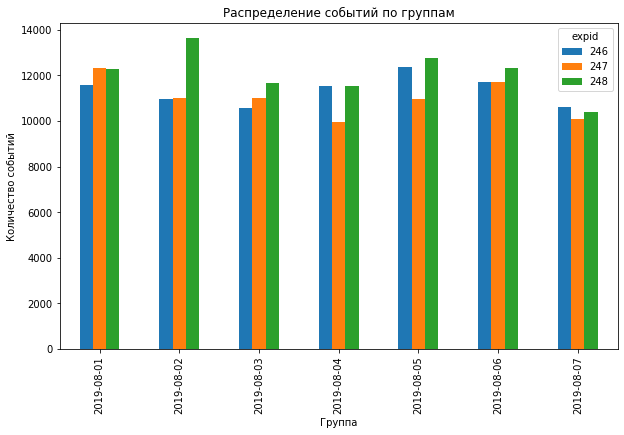

In [17]:
events_per_date = df.pivot_table(index='eventdate', columns='expid', values='index', aggfunc='count', fill_value=0)
events_per_date.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Группа')
plt.ylabel('Количество событий')
plt.title('Распределение событий по группам')
plt.show()

<div class="alert alert-success">

**✔️ Комментарий ревьюера ✔️**
   
   Хорошо👍 Мы убедились, что пользователи сохранены по каждой из трех групп после фильтрации - приступим к изучению воронки

</div>


## Анализ воронки продаж

Данные обработанны и готовы к анализу, поэтому перейдем к анализу воронки продаж. Для начал посмотрим, какие события есть в логах, как часто они встречаются. Отсортируем события по частоте.

In [18]:
df['eventname'].value_counts()

MainScreenAppear           117328
OffersScreenAppear          46333
CartScreenAppear            42303
PaymentScreenSuccessful     33918
Tutorial                     1005
Name: eventname, dtype: int64

В данных мы можем наблюдать следующие события: 
1. MainScreenAppear. Это событие указывает на то, что пользователь увидел главный экран приложения. Количество таких событий составляет 117,328.
2. OffersScreenAppear.Это событие фиксирует, когда пользователь видит экран с предложениями (например, скидки или специальные предложения). Количество таких событий равно 46,333.
3. CartScreenAppear. Это событие происходит, когда пользователь открывает экран корзины, где отображаются добавленные в корзину товары. Количество таких событий составляет 42,303.
4. PaymentScreenSuccessful. Это событие фиксирует успешное отображение экрана оплаты, когда пользователь завершил процесс покупки и переходит к экрану подтверждения. Количество таких событий равно 33,918.
5. Tutorial. Это событие указывает на просмотр обучающих материалов или прохождение интерактивного учебного руководства. Количество таких событий составляет 1,005.

Посчитаем, сколько пользователей совершали каждое из этих событий. Отсортируем события по числу пользователей. Посчитаем долю пользователей, которые хоть раз совершали событие.

In [19]:
user_counts = df.groupby('eventname')['deviceidhash'].nunique().sort_values(ascending=False).reset_index()
user_counts.columns = ['eventname', 'unique_deviceidhash_count']
display("Количество пользователей по событиям, отсортированное по убыванию:")
user_counts

'Количество пользователей по событиям, отсортированное по убыванию:'

,eventname,unique_deviceidhash_count
0,MainScreenAppear,7419
1,OffersScreenAppear,4593
2,CartScreenAppear,3734
3,PaymentScreenSuccessful,3539
4,Tutorial,840


In [20]:
total_users = df['deviceidhash'].nunique()
user_counts['user_proportions'] = (user_counts['unique_deviceidhash_count'] / total_users) * 100
display("Доля пользователей, совершавших каждое событие, в процентах:")
user_counts

'Доля пользователей, совершавших каждое событие, в процентах:'

,eventname,unique_deviceidhash_count,user_proportions
0,MainScreenAppear,7419,98.473586
1,OffersScreenAppear,4593,60.963632
2,CartScreenAppear,3734,49.561986
3,PaymentScreenSuccessful,3539,46.973719
4,Tutorial,840,11.149456


Предположим, что первым событием в пользовательском пути является MainScreenAppear, поскольку это первое, что пользователь видит после открытия приложения. Последним событием перед тем, как пользователь совершает покупку, является PaymentScreenSuccessful. Логично предположить, что перед совершением покупки пользователь должен был находиться в корзине, таким образом, событие CartScreenAppear будет предшествовать PaymentScreenSuccessful.

Оставшиеся события, OffersScreenAppear и Tutorial, могут быть расположены на промежуточных этапах пользовательского пути, поскольку пользователь может взаимодействовать с разными разделами приложения. Однако, для целей анализа воронки продаж событие Tutorial можно не учитывать, так как оно не является ключевым этапом в процессе покупки.

Исходя из вышеизложенного, воронка продаж выстраивается следующим образом (сверху вниз):

1. MainScreenAppear
2. OffersScreenAppear
3. CartScreenAppear
4. PaymentScreenSuccessful

Посичтаем долю пользователей проходящих на следующий шаг воронки или конверсию в шаг и обычную конверсию, а после опишем результаты:

<div class="alert alert-danger">

**❌ Комментарий ревьюера ❌**
   
   Не рекомендую прописывать числа для расчетов самостоятельно c клавиатуры ([7419, 4593, 3734, 3539])- легко допустить ошибку, и расчеты будут не верны. Если же мы получим число непосредственно из данных с помощью кода - такой проблемы не будет 
   

</div>


<div class="alert alert-block alert-info">
    
Исправил 
    
</div>

<div class="alert alert-success">

**✔️ Комментарий ревьюера v2✔️**
   
   Хорошо👍

</div>


In [21]:
user_counts['conversion'] = (user_counts['unique_deviceidhash_count'] / user_counts['unique_deviceidhash_count'][0]) * 100
user_counts['conversion'] = user_counts['conversion'].round(2).astype(str) + '%'
user_counts

,eventname,unique_deviceidhash_count,user_proportions,conversion
0,MainScreenAppear,7419,98.473586,100.0%
1,OffersScreenAppear,4593,60.963632,61.91%
2,CartScreenAppear,3734,49.561986,50.33%
3,PaymentScreenSuccessful,3539,46.973719,47.7%
4,Tutorial,840,11.149456,11.32%


In [22]:
conversion_step = [100]  # Первое значение конверсии в шаг для "MainScreenAppear" = 100%
for i in range(1, len(user_counts)):
    conversion = (user_counts['unique_deviceidhash_count'][i] / user_counts['unique_deviceidhash_count'][i - 1]) * 100
    conversion_step.append(conversion)
user_counts['conversion_per_step'] = conversion_step
user_counts['conversion_per_step'] = user_counts['conversion_per_step'].round(2).astype(str) + '%'
user_counts

,eventname,unique_deviceidhash_count,user_proportions,conversion,conversion_per_step
0,MainScreenAppear,7419,98.473586,100.0%,100.0%
1,OffersScreenAppear,4593,60.963632,61.91%,61.91%
2,CartScreenAppear,3734,49.561986,50.33%,81.3%
3,PaymentScreenSuccessful,3539,46.973719,47.7%,94.78%
4,Tutorial,840,11.149456,11.32%,23.74%


In [64]:
data = dict(
    number=[user_counts.loc[0, 'unique_deviceidhash_count'], user_counts.loc[1, 'unique_deviceidhash_count'], user_counts.loc[2, 'unique_deviceidhash_count'], user_counts.loc[3, 'unique_deviceidhash_count']],
    stage=[user_counts.loc[0, 'eventname'], user_counts.loc[1, 'eventname'], user_counts.loc[2, 'eventname'], user_counts.loc[3, 'eventname']])
fig = px.funnel(data, x='number', y='stage')
fig.update_layout(title='Воронка', title_x = 0.5)
fig.update_layout(title='Воронка', title_x = 0.5)
fig.show()

<div class="alert alert-warning">

**⚠️ Комментарий ревьюера v2⚠️**
   
   Заголовок можно добавить с помощью `fig.update_layout(title='Воронка', title_x = 0.5)`

</div>




In [24]:
# Код ревьюера
data = dict(
    number=[user_counts.loc[0, 'unique_deviceidhash_count'], user_counts.loc[1, 'unique_deviceidhash_count'], user_counts.loc[2, 'unique_deviceidhash_count'], user_counts.loc[3, 'unique_deviceidhash_count']],
    stage=[user_counts.loc[0, 'eventname'], user_counts.loc[1, 'eventname'], user_counts.loc[2, 'eventname'], user_counts.loc[3, 'eventname']])
fig = px.funnel(data, x='number', y='stage')
fig.update_layout(title='Воронка', title_x = 0.5)
fig.show()

Анализируя таблицу и графики выше можно констатировать следующее:

- Наибольшее количесвто пользователей отпадает между событиями 'MainScreenAppear' и 'OffersScreenAppear'. Потеря составляет 2826 пользователей или 38.09 процентов, что указывает на потенциальные проблемы на этом этапе - возможно, пользователи не находят предложения привлекательными для низ или сталкиваются с техническими проблемами. 
- Доля полбзователей, которые доходят от певрого до последнего события, то есть проходят всю воронку, составляет 47.7 процентов или 3539 из 7419 пользователей завершают оплату, что можно охарактеризовать как хороший показатель конверсии.
- Конверсия на последнем шаге - между 'CartScreenAppear' и 'PaymentScreenSuccessful' довольно высокая, что означает, что те, кто дошел до этапа оплаты, с высокой вероятностью завершают покупку.

Главная рекомендация - стоит обратить внимание и изучить просадку в шаге между 'MainScreenAppear' и 'OffersScreenAppear'. Для улучшения конверсии стоит сфокусироваться на оптимизации перехода от главного экрана к экрану предложений, возможно, через более точное таргетирование предложений или устранение возможных технических проблем.

<div class="alert alert-success">

**✔️ Комментарий ревьюера ✔️** 
   
   Очень хорошо - проблема обнаружена - провал на первом шаге: от `MainScreenAppear` к `OffersScreenAppear`. Вероятно, нужно лучше прорабатывать механику, чтобы пользователи переходили к `OffersScreen`.
    
`Tutorial`, действительно, можно просто пропустить.
</div>


<div class="alert alert-danger">

**❌ Комментарий ревьюера ❌**
   
   Воронку необходимо визуализировать с помощью графика - можно использовать любой тип графика, подходящий для решения задачи, или воспользоваться инструкцией по plotly ниже

</div>
<div class="alert alert-warning">

**⚠️ Комментарий ревьюера ⚠️**
   
   
   На данном этапе рекомендую ознакомиться с инструментом `plotly` для построения воронок - пригодится в дальнейшей работе: https://habr.com/ru/company/otus/blog/588190/ Не забудь исключить tutorial с визуализации и добавить заголовок у воронки.

</div>


<div class="alert alert-block alert-info">
    
Спасибо за полезную ссылку. График добавил!
    
</div>

<div class="alert alert-success">

**✔️ Комментарий ревьюера v2✔️**
   
   Исправлено👍

</div>


## Анализ A/A/B-теста

Перейдем ко второму этапу анализа и взгялем на результаты A/A/B-теста. Для начала взглянем на количесвто пользователей в каждой экспериментальной группе. 

In [25]:
expgroup_counts = df.groupby('expid')['deviceidhash'].nunique().sort_values(ascending=False).reset_index()
expgroup_counts.rename(columns={'deviceidhash': 'total_deviceidhash'}, inplace=True)
expgroup_counts

,expid,total_deviceidhash
0,248,2537
1,247,2513
2,246,2484


- 246 — контрольная группа и в ней 2484 пользователей
- 247 — также контрольная группа и в ней 2513 пользователей
- 248 — экспериментальная группа и в ней 2537 пользователей

Мы можем наблюдать, что пользователи распределяются между сегментами неравномерно, что создает риск получить полностью некорретные результаты анализа A/B-тестировани. Проверим, есть ли в таблице пересекающиеся пользователи, оказавшиеся одновременно в нескольких группах. Дело в том, что при АВ тестировании могут быть ошибки при логировании и распределении пользователей по группам

In [26]:
df.groupby('deviceidhash').agg({'expid':'nunique'}).query('expid > 1')['expid'].count()

0

Пересекающихся пользователей нет. Самая большая разница в количестве пользователей в группах составляет 2%. Риск, что это может повлиять на результаты АВ тестирования есть, но он относительно небольшой. Можем продолжить работу.

<div class="alert alert-success">

**✔️ Комментарий ревьюера ✔️**
   
   Это хорошо👍

</div>


Перед тем, как приступать к анализу А/B-эксперимента проверим корректность всех механизмов и расчётов с помощью А/А-эксперимента. Проверим, находят ли статистические критерии разницу между выборками 246 и 247. Если трафик и инструмент проведения A/A-теста не подвели, различий в показателях не будет. Количество пользователей в группах различается примерно на 1% и попавшие в одну из групп посетители остались в этой группе до конца теста, что должно способствовать удачному проведению теста.

Для данной цели лучше всего выбрать z-тест, так как этот тест используется для проверки гипотез о равенстве долей. Поскольку речь идет о конверсии пользователей, наиболее подходящим тестом для проверки равенства конверсий между двумя контрольными группами будет Z-тест для пропорций.

Общее количество пользователей в группе 246 и 247 нам уже известно

In [27]:
trials_all_246_247 = np.array([expgroup_counts.loc[2, 'total_deviceidhash'],expgroup_counts.loc[1, 'total_deviceidhash']])

<div class="alert alert-danger">

**❌ Комментарий ревьюера ❌**
   
   Ввод значений вручную следует убрать здесь и далее. После этого посмотрим на результаты

</div>


<div class="alert alert-block alert-info">
    
Исправил 
    
</div>

<div class="alert alert-success">

**✔️ Комментарий ревьюера v2✔️**
   
   👍

</div>


Для каждой из контрольных групп (246 и 247) подсчитаем количество пользователей, которые завершили воронку (то есть успешно сконвертировались).

In [28]:
expgroup_counts_pscreen = df.query('eventname == "PaymentScreenSuccessful"').groupby('expid')['deviceidhash'].nunique().sort_values(ascending=False).reset_index()
expgroup_counts_pscreen.rename(columns={'deviceidhash': 'payment_screen_deviceidhash'}, inplace=True)
expgroup_counts_pscreen

,expid,payment_screen_deviceidhash
0,246,1200
1,248,1181
2,247,1158


In [29]:
successes_buy_246_247 = np.array([expgroup_counts_pscreen.loc[0, 'payment_screen_deviceidhash'],expgroup_counts_pscreen.loc[2, 'payment_screen_deviceidhash']])

- H0 = Доли пользователей из контрольных групп 246 и 247, дошедших до события PaymentScreenSuccessful, одинаковы
- H1 = Доли пользователей из контрольных групп 246 и 247, дошедших до события PaymentScreenSuccessful, разные
- Уровень значимости 𝛼 = 0.05

In [30]:
alpha = 0.05 # определяем критический уровень статистической значимости

Подставляем значения в функцию для проверки гипотезы о равенстве долей. 

In [31]:
z_test_proportions(successes_buy_246_247, trials_all_246_247, alpha)

'p-значение:'

0.11456679313141849

'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными'

Результаты теста нам говорят о том, что статистические критерии не находят разницу между выборками 246 и 247, а это значит, что A/A-тест проведен успешно, но перед тем, как анализировать результаты A/B-тестирования проверим и другие события

Выберем самое популярное событие - MainScreenAppear. Посчитаем число пользователей, совершивших это событие в каждой из контрольных групп и проверим, будет ли отличие между группами статистически достоверным. 

In [32]:
expgroup_counts_mscreen = df.query('eventname == "MainScreenAppear"').groupby('expid')['deviceidhash'].nunique().sort_values(ascending=False).reset_index()
expgroup_counts_mscreen.rename(columns={'deviceidhash': 'main_screen_deviceidhash'}, inplace=True)
expgroup_counts_mscreen

,expid,main_screen_deviceidhash
0,248,2493
1,247,2476
2,246,2450


In [33]:
successes_mscreen_246_247 = np.array([expgroup_counts_mscreen.loc[2, 'main_screen_deviceidhash'],expgroup_counts_mscreen.loc[1, 'main_screen_deviceidhash']])

- H0 = Доли пользователей из контрольных групп 246 и 247, дошедших до события MainScreenAppear, одинаковы
- H1 = Доли пользователей из контрольных групп 246 и 247, дошедших до события MainScreenAppear, разные
- Уровень значимости 𝛼 = 0.05

In [34]:
z_test_proportions(successes_mscreen_246_247, trials_all_246_247, alpha)

'p-значение:'

0.7570597232046099

'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными'

Нет, отличие между группами нельзя считать достоверным - результат такой же как и для экрана покупки.

Проделаем то же самое для всех других событий. Можно ли с увереностью сказать, что разбиение на группы работает корректно?

Возьмем событие "OffersScreenAppear"

In [35]:
expgroup_counts_oscreen = df.query('eventname == "OffersScreenAppear"').groupby('expid')['deviceidhash'].nunique().sort_values(ascending=False).reset_index()
expgroup_counts_oscreen.rename(columns={'deviceidhash': 'offers_screen_deviceidhash'}, inplace=True)
expgroup_counts_oscreen

,expid,offers_screen_deviceidhash
0,246,1542
1,248,1531
2,247,1520


In [36]:
successes_oscreen_246_247 = np.array([expgroup_counts_oscreen.loc[0, 'offers_screen_deviceidhash'],expgroup_counts_oscreen.loc[2, 'offers_screen_deviceidhash']])

- H0 = Доли пользователей из контрольных групп 246 и 247, дошедших до события OffersScreenAppear, одинаковы
- H1 = Доли пользователей из контрольных групп 246 и 247, дошедших до события OffersScreenAppear, разные
- Уровень значимости 𝛼 = 0.05

In [37]:
z_test_proportions(successes_oscreen_246_247, trials_all_246_247, alpha)

'p-значение:'

0.2480954578522181

'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными'

Нет, отличие между группами нельзя считать достоверным

Возьмем событие "CartScreenAppear"

In [38]:
expgroup_counts_cscreen = df.query('eventname == "CartScreenAppear"').groupby('expid')['deviceidhash'].nunique().sort_values(ascending=False).reset_index()
expgroup_counts_cscreen.rename(columns={'deviceidhash': 'cart_screen_deviceidhash'}, inplace=True)
expgroup_counts_cscreen

,expid,cart_screen_deviceidhash
0,246,1266
1,247,1238
2,248,1230


In [39]:
successes_cscreen_246_247 = np.array([expgroup_counts_cscreen.loc[0, 'cart_screen_deviceidhash'],expgroup_counts_cscreen.loc[1, 'cart_screen_deviceidhash']])

- H0 = Доли пользователей из контрольных групп 246 и 247, дошедших до события CartScreenAppear, одинаковы
- H1 = Доли пользователей из контрольных групп 246 и 247, дошедших до события CartScreenAppear, разные
- Уровень значимости 𝛼 = 0.05

In [40]:
z_test_proportions(successes_cscreen_246_247, trials_all_246_247, alpha)

'p-значение:'

0.22883372237997213

'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными'

Результат для всех сравнений одинаковый - статистически достоверных отличий между группами 246 и 247 нет, а значит можно с увереностью сказать, что разбиение на группы работает корректно и переходить к A/B-тестированию.

Поступим аналогично с группой с изменённым шрифтом - 248. Сравним результаты с каждой из контрольных групп в отдельности по каждому событию, а также сравним результаты с объединённой контрольной группой. Проанализруем выводы из эксперимента.

Cоеденим число пользователей, совершивших все событие в каждой из групп в один датасет

In [41]:
df_ab = expgroup_counts.merge(expgroup_counts_mscreen, on='expid', how='left')\
                        .merge(expgroup_counts_oscreen, on='expid', how='left')\
                        .merge(expgroup_counts_cscreen, on='expid', how='left')\
                        .merge(expgroup_counts_pscreen, on='expid', how='left')
df_ab = df_ab.pivot_table(
    index=None,          # Мы не задаем индекс, так как хотим сделать "развернутую" таблицу
    columns='expid',     # expid будут новыми столбцами
    aggfunc='first'      # Используем 'first', так как у нас нет дублирующихся значений для одного и того же expid
)
# Упорядочиваем столбцы
df_ab = df_ab.reindex(['total_deviceidhash', 'main_screen_deviceidhash', 'offers_screen_deviceidhash', 
                       'cart_screen_deviceidhash', 'payment_screen_deviceidhash'])
df_ab

expid,246,247,248
total_deviceidhash,2484,2513,2537
main_screen_deviceidhash,2450,2476,2493
offers_screen_deviceidhash,1542,1520,1531
cart_screen_deviceidhash,1266,1238,1230
payment_screen_deviceidhash,1200,1158,1181


In [42]:
trials_all_246_248 = np.array([df_ab.iloc[0, 0], df_ab.iloc[0, 2]])
trials_all_247_248 = np.array([df_ab.iloc[0, 1], df_ab.iloc[0, 2]])

In [43]:
successes_mscreen_246_248 = np.array([df_ab.iloc[1, 0], df_ab.iloc[1, 2]])
successes_mscreen_247_248 = np.array([df_ab.iloc[1, 1], df_ab.iloc[1, 2]])

In [44]:
successes_oscreen_246_248 = np.array([df_ab.iloc[2, 0], df_ab.iloc[2, 2]])
successes_oscreen_247_248 = np.array([df_ab.iloc[2, 1], df_ab.iloc[2, 2]])

In [45]:
successes_cscreen_246_248 = np.array([df_ab.iloc[3, 0], df_ab.iloc[3, 2]])
successes_cscreen_247_248 = np.array([df_ab.iloc[3, 1], df_ab.iloc[3, 2]])

In [46]:
successes_pscreen_246_248 = np.array([df_ab.iloc[4, 0], df_ab.iloc[4, 2]])
successes_pscreen_247_248 = np.array([df_ab.iloc[4, 1], df_ab.iloc[4, 2]])

- H0 = Доли пользователей из контрольных групп 246 и 248, дошедших до события MainScreenAppear, одинаковы
- H1 = Доли пользователей из контрольных групп 246 и 248, дошедших до события MainScreenAppear, разные
- Уровень значимости 𝛼 = 0.05

In [47]:
z_test_proportions(successes_mscreen_246_248, trials_all_246_248, alpha)

'p-значение:'

0.2949721933554552

'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными'

- H0 = Доли пользователей из контрольных групп 246 и 248, дошедших до события OffersScreenAppear, одинаковы
- H1 = Доли пользователей из контрольных групп 246 и 248, дошедших до события OffersScreenAppear, разные
- Уровень значимости 𝛼 = 0.05

In [48]:
z_test_proportions(successes_oscreen_246_248, trials_all_246_248, alpha)

'p-значение:'

0.20836205402738917

'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными'

- H0 = Доли пользователей из контрольных групп 246 и 248, дошедших до события CartScreenAppea, одинаковы
- H1 = Доли пользователей из контрольных групп 246 и 248, дошедших до события CartScreenAppea, разные
- Уровень значимости 𝛼 = 0.05

In [49]:
z_test_proportions(successes_cscreen_246_248, trials_all_246_248, alpha)

'p-значение:'

0.07842923237520116

'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными'

- H0 = Доли пользователей из контрольных групп 246 и 248, дошедших до события PaymentScreenSuccessful, одинаковы
- H1 = Доли пользователей из контрольных групп 246 и 248, дошедших до события PaymentScreenSuccessful, разные
- Уровень значимости 𝛼 = 0.05

In [50]:
z_test_proportions(successes_pscreen_246_248, trials_all_246_248, alpha)

'p-значение:'

0.2122553275697796

'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными'

- H0 = Доли пользователей из контрольных групп 247 и 248, дошедших до события MainScreenAppear, одинаковы
- H1 = Доли пользователей из контрольных групп 247 и 248, дошедших до события MainScreenAppear, разные
- Уровень значимости 𝛼 = 0.05

In [51]:
z_test_proportions(successes_mscreen_247_248, trials_all_247_248, alpha)

'p-значение:'

0.4587053616621515

'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными'

- H0 = Доли пользователей из контрольных групп 247 и 248, дошедших до события OffersScreenAppear, одинаковы
- H1 = Доли пользователей из контрольных групп 247 и 248, дошедших до события OffersScreenAppear, разные
- Уровень значимости 𝛼 = 0.05

In [52]:
z_test_proportions(successes_oscreen_247_248 , trials_all_247_248, alpha)

'p-значение:'

0.9197817830592261

'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными'

- H0 = Доли пользователей из контрольных групп 247 и 248, дошедших до события CartScreenAppea, одинаковы
- H1 = Доли пользователей из контрольных групп 247 и 248, дошедших до события CartScreenAppea, разные
- Уровень значимости 𝛼 = 0.05

In [53]:
z_test_proportions(successes_cscreen_247_248 , trials_all_247_248, alpha)

'p-значение:'

0.5786197879539783

'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными'

- H0 = Доли пользователей из контрольных групп 247 и 248, дошедших до события PaymentScreenSuccessful, одинаковы
- H1 = Доли пользователей из контрольных групп 247 и 248, дошедших до события PaymentScreenSuccessful, разные
- Уровень значимости 𝛼 = 0.05

In [54]:
z_test_proportions(successes_pscreen_247_248, trials_all_247_248, alpha)

'p-значение:'

0.7373415053803964

'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными'

Сравнив результаты с каждой из контрольных групп по каждому событию, можно заключить, что нет оснований считать доли различными. Это означает, что изменение шрифта не оказало статистически значимого влияния.

Теперь сравним результаты с объединённой контрольной группой.

In [55]:
trials_all_246_247_248 = np.array([df_ab.iloc[0, 0]+df_ab.iloc[0, 1],df_ab.iloc[0, 2]]) 

In [56]:
successes_mscreen_246_247_248 = np.array([df_ab.iloc[1, 0]+df_ab.iloc[1, 1],df_ab.iloc[1, 2]]) 

In [57]:
successes_oscreen_246_247_248 = np.array([df_ab.iloc[2, 0]+df_ab.iloc[2, 1],df_ab.iloc[2, 2]]) 

In [58]:
successes_cscreen_246_247_248 = np.array([df_ab.iloc[3, 0]+df_ab.iloc[3, 1],df_ab.iloc[3, 2]]) 

In [59]:
successes_pscreen_246_247_248 = np.array([df_ab.iloc[4, 0]+df_ab.iloc[4, 1],df_ab.iloc[4, 2]]) 

- H0 = Доли пользователей из контрольных групп 246+247 и 248, дошедших до события MainScreenAppear, одинаковы
- H1 = Доли пользователей из контрольных групп 246+247 и 248, дошедших до события MainScreenAppear, разные
- Уровень значимости 𝛼 = 0.05

In [60]:
z_test_proportions(successes_mscreen_246_247_248, trials_all_246_247_248, alpha)

'p-значение:'

0.29424526837179577

'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными'

- H0 = Доли пользователей из контрольных групп 246+247 и 248, дошедших до события OffersScreenAppear, одинаковы
- H1 = Доли пользователей из контрольных групп 246+247 и 248, дошедших до события OffersScreenAppear, разные
- Уровень значимости 𝛼 = 0.05

In [61]:
z_test_proportions(successes_oscreen_246_247_248 , trials_all_246_247_248, alpha)

'p-значение:'

0.43425549655188256

'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными'

- H0 = Доли пользователей из контрольных групп 246+247 и 248, дошедших до события CartScreenAppea, одинаковы
- H1 = Доли пользователей из контрольных групп 246+247 и 248, дошедших до события CartScreenAppea, разные
- Уровень значимости 𝛼 = 0.05

In [62]:
z_test_proportions(successes_cscreen_246_247_248 , trials_all_246_247_248, alpha)

'p-значение:'

0.18175875284404386

'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными'

- H0 = Доли пользователей из контрольных групп 246+247 и 248, дошедших до события PaymentScreenSuccessful, одинаковы
- H1 = Доли пользователей из контрольных групп 246+247 и 248, дошедших до события PaymentScreenSuccessful, разные
- Уровень значимости 𝛼 = 0.05

In [63]:
z_test_proportions(successes_pscreen_246_247_248, trials_all_246_247_248, alpha)

'p-значение:'

0.6004294282308704

'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными'

Сравинив эксперементальную группу с объединённой контрольной группой, можно увтерждать, что значимых различий нет, что говорит о том, что изменение шрифта не оказало статистически значимого влияния.

В статистических тестах обычно применяется уровень значимости 0,05, что означает 5% вероятность ошибочного отклонения нулевой гипотезы, если она верна. Это ошибку первого рода, или ложнопозитивный результат теста, при котором разница между сравниваемыми группами отсутствует, но тест показывает p-value, меньшее уровня значимости, что ведет к ошибочному отвергнению нулевой гипотезы (H0). В нашем случае также следует учитывать возможность накопительной ошибки из-за множественного тестирования, известной как групповая вероятность ошибки первого рода (FWER).

Мы провели 16 тестов, сравнивая группы 246 и 247, 246 и 248, 247 и 248, а также объединённую контрольную группу и 248. Для контроля вероятности ошибки первого рода можно использовать методы коррекции уровня значимости, такие как коррекция Бонферрони или метод Холма.

Мы установили уровень значимости на 0,05 и получили результаты, при которых нулевая гипотеза не была отвергнута в каждом тесте. Однако, если бы уровень значимости был установлен на 0,1, то нулевая гипотеза о равенстве долей пользователей из контрольных групп 246 и 248, достигших события CartScreenAppears, была бы отвергнута, так как p-значение в этом тесте составило 0,0784.

В случае выбора уровня значимости 0,1 и применения коррекции по методу Бонферрони, новый уровень значимости составил бы 0,1/16 = 0.00625. Это свидетельствует о том, что в таких условиях тест не привёл бы к отверганию нулевой гипотезы.

<div class="alert alert-danger">

**❌ Комментарий ревьюера ❌**
   
   У нас всего должно получиться 16 проверок нулевых гипотез - проверяем по 4 события в каждом из сравнений групп 246/247, 246/248, 247/248 и 246+247/248 - при использовании поправки Бонферрони делим альфа на общее число нулевых гипотез 0,1/16 во всех случаях 

</div>


<div class="alert alert-block alert-info">
    
Исправил 
    
</div>

<div class="alert alert-success">

**✔️ Комментарий ревьюера v2✔️**
   


   
   Очень хорошо, мы разобрались с использованием поправки Бонферрони. Однако отмечу, что данная поправка используется редко. Причины: эта поправка слишком сильно уменьшает уровень альфа, опровергнуть нулевую гипотезу становится фактически невозможно; повышается вероятность совершить ошибку второго рода. Возможное решение - использовать менее мощные поправки - рекомендую ознакомиться со статьей: https://studfile.net/preview/10706903/page:19/
Также рекомендую статью: https://habr.com/ru/company/yandex/blog/476826/ - в ней описывается применение библиотеки `statsmodels` - пригодится в дальнейшем                    

</div>




## Заключение

В данном исследовании мы провели всесторонний анализ поведения пользователей мобильного приложения для продажи продуктов питания и оценили влияние дизайнерских изменений на взаимодействие с приложением. Исследование включало анализ воронки продаж и результаты A/A/B-эксперимента.

- Воронка продаж в нашем приложении структурируется следующим образом:
    - MainScreenAppear
    - OffersScreenAppear
    - CartScreenAppear
    - PaymentScreenSuccessful

- Анализ воронки продаж показал, что:
  - Наибольшие потери пользователей происходят между событиями 'MainScreenAppear' и 'OffersScreenAppear', где теряется 38,09% пользователей (2826 из 7419). Это указывает на потенциальные проблемы на этом этапе, такие как недостаточная привлекательность предложений или технические сбои.
  - Доля пользователей, успешно проходящих всю воронку от 'MainScreenAppear' до 'PaymentScreenSuccessful', составляет 47,7% (3539 из 7419), что можно считать хорошим показателем конверсии.
  - Конверсия на последнем шаге воронки, между 'CartScreenAppear' и 'PaymentScreenSuccessful', достаточно высокая, что свидетельствует о том, что пользователи, достигшие этапа оплаты, с высокой вероятностью завершают покупку.
  - Рекомендуется сосредоточиться на оптимизации перехода от главного экрана к экрану предложений для повышения конверсии, возможно, через улучшение таргетинга предложений или устранение технических проблем.

- Анализ A/A-теста:
  - Проверка распределения пользователей между контрольными группами 246 и 247 показала, что разница в количестве пользователей составляет около 1%, что незначительно и не оказывает существенного влияния на результаты A/B-тестирования. Не было обнаружено пересекающихся пользователей между группами. А также результаты теста нам говорят о том, что статистические критерии не находят разницу между выборками 246 и 247, а это значит, что A/A-тест проведен успешно. Таким образом, разбиение на группы можно считать корректным, что позволяет перейти к A/B-тестированию.

- Анализ A/B-тестирования:
  - Сравнение результатов между экспериментальной группой, использующей новые шрифты, и контрольными группами показало, что изменение шрифта не оказывает статистически значимого влияния на ключевые метрики. По всем событиям не было обнаружено статистически значимых различий между группами, что свидетельствует о том, что изменения в дизайне шрифтов не оказали значимого эффекта на поведение пользователей.

В заключение, исследование подтвердило, что текущие дизайнерские изменения не приводят к улучшению ключевых метрик, а воронка продаж требует оптимизации на этапе перехода от главного экрана к экрану предложений. Эти выводы помогут сфокусироваться на наиболее значимых аспектах улучшения пользовательского опыта и принятия обоснованных решений по дальнейшему развитию приложения.

<div class="alert alert-success">

**✔️ Комментарий ревьюера ✔️**
   
   Артемий, проведен основательный и подробный анализ. Все наглядно - графики и гистограммы подтверждают обоснованные выводы. Учти мои замечания. Возможно, придется немного подправить выводы. Жду твой проект на повторное ревью. Успехов!

</div>


<div class="alert alert-block alert-info">
    
Благодарю за полезные комментарии. Провел исправления по ним. Вывод не поменялся, поэтому оставляю его без исправлений. 
    
</div>

<div class="alert alert-success">

**✔️ Комментарий ревьюера v3✔️**
   
   Артемий, замечания устранены 👍. Уверен, мои советы пригодятся тебе в новых проектах. Успехов в обучении! 😉 

</div>